## Fuel Consumption Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn

#### The variables we will use.

HBPPOPDN, HHFAMINC, HH_RACE, HOMEOWN, EDUC, HHSIZE (N), HHVEHCNT (N), NUMADLT (N), WRKCOUNT (N)   
TRVLCMIN (N), TRPMILES (N)  

In [2]:
### import the NHTS database
HH_data = pd.read_csv("hhpub.csv")
TRIP_data = pd.read_csv("trippub.csv")
VEH_data = pd.read_csv("vehpub.csv")

In [3]:
### Select the columns needed.
HH_data2 = HH_data[['HOUSEID','HBPPOPDN','HHFAMINC',\
                    'HH_RACE','HOMEOWN','HHSIZE',\
                    'HHVEHCNT','NUMADLT','WRKCOUNT','URBRUR']]
HH_data2.head()

,HOUSEID,HBPPOPDN,HHFAMINC,HH_RACE,HOMEOWN,HHSIZE,HHVEHCNT,NUMADLT,WRKCOUNT,URBRUR
0,30000007,750,7,2,1,3,5,3,1,1
1,30000008,300,8,1,1,2,4,2,2,2
2,30000012,17000,10,1,1,1,2,1,1,1
3,30000019,750,3,1,1,2,2,2,0,1
4,30000029,1500,5,1,1,2,2,2,0,1


In [4]:
TRIP_data2 = TRIP_data[['HOUSEID','PERSONID','TDTRPNUM','EDUC','TRVLCMIN','TRPMILES','WHYTRP1S']] 
TRIP_data2.head()

,HOUSEID,PERSONID,TDTRPNUM,EDUC,TRVLCMIN,TRPMILES,WHYTRP1S
0,30000007,1,1,3,15,5.244,20
1,30000007,1,2,3,20,5.149,1
2,30000007,2,1,3,120,84.004,1
3,30000007,2,2,3,150,81.628,10
4,30000007,3,1,2,15,2.250,20


In [5]:
VEH_data2 = VEH_data[['HOUSEID','VEHID','GSCOST','GSTOTCST','GSYRGAL']]
VEH_data2.head()

,HOUSEID,VEHID,GSCOST,GSTOTCST,GSYRGAL
0,30000007,1,2.31275,1126.457778,487.064221
1,30000007,2,2.31275,580.267873,250.899523
2,30000007,3,2.31275,1027.930589,444.462475
3,30000007,4,2.31275,93.272224,40.329575
4,30000007,5,2.31275,2054.656806,888.404197


In [6]:
### Preproceesing the data. Deleted the rows that are Nan or no response.
HH_data3 = HH_data2

HH_data3 = HH_data3[~HH_data3['HBPPOPDN'].isin([-9])]
HH_data3 = HH_data3[~HH_data3['HHFAMINC'].isin([-9])]
HH_data3 = HH_data3[~HH_data3['HHFAMINC'].isin([-8])]
HH_data3 = HH_data3[~HH_data3['HHFAMINC'].isin([-7])]
HH_data3 = HH_data3[~HH_data3['HH_RACE'].isin([-8])]
HH_data3 = HH_data3[~HH_data3['HH_RACE'].isin([-7])]
# HH_data3 = HH_data3[~HH_data3['HH_RACE'].isin([97])]
HH_data3 = HH_data3[~HH_data3['HOMEOWN'].isin([-8])]
HH_data3 = HH_data3[~HH_data3['HOMEOWN'].isin([-7])]
HH_data3 = HH_data3[~HH_data3['HOMEOWN'].isin([97])]

In [7]:
### Processed dataset.
hh_data = HH_data3
hh_data.head()

,HOUSEID,HBPPOPDN,HHFAMINC,HH_RACE,HOMEOWN,HHSIZE,HHVEHCNT,NUMADLT,WRKCOUNT,URBRUR
0,30000007,750,7,2,1,3,5,3,1,1
1,30000008,300,8,1,1,2,4,2,2,2
2,30000012,17000,10,1,1,1,2,1,1,1
3,30000019,750,3,1,1,2,2,2,0,1
4,30000029,1500,5,1,1,2,2,2,0,1


In [8]:
### Preproceesing the data. Deleted the rows that are Nan or no response.
TRIP_data3 = TRIP_data2

TRIP_data3 = TRIP_data3[~TRIP_data3['TRVLCMIN'].isin([-9])]
TRIP_data3 = TRIP_data3[~TRIP_data3['TRPMILES'].isin([-9])]
TRIP_data3 = TRIP_data3[~TRIP_data3['EDUC'].isin([-8])]
TRIP_data3 = TRIP_data3[~TRIP_data3['EDUC'].isin([-7])]
TRIP_data3 = TRIP_data3[~TRIP_data3['EDUC'].isin([-1])]
# len(TRIP_data3)

In [9]:
### Group the data for each household.
trip_time_total = TRIP_data3.groupby(['HOUSEID'])[['TRVLCMIN']].mean()
trip_time_total = trip_time_total.reset_index()

trip_dis_total = TRIP_data3.groupby(['HOUSEID'])[['TRPMILES']].mean()
trip_dis_total = trip_dis_total.reset_index()

trip_edu = TRIP_data3.groupby(['HOUSEID'])[['EDUC']].mean().round()
trip_edu = trip_edu.reset_index()

trip_time_total.head()

,HOUSEID,TRVLCMIN
0,30000007,55.833333
1,30000008,12.500000
2,30000012,30.555556
3,30000019,15.000000
4,30000029,15.700000


In [10]:
### Processed dataset.
trip_data = pd.merge(trip_time_total,trip_dis_total,on='HOUSEID',how='inner')
trip_data = pd.merge(trip_data,trip_edu,on='HOUSEID',how='inner')
# trip_data = pd.merge(trip_data,TRIP_data3,on='HOUSEID',how='inner')
trip_data.head()

,HOUSEID,TRVLCMIN,TRPMILES,EDUC
0,30000007,55.833333,30.086333,3.0
1,30000008,12.500000,8.017000,5.0
2,30000012,30.555556,14.090778,5.0
3,30000019,15.000000,3.049500,2.0
4,30000029,15.700000,6.134100,2.0


In [11]:
### Preproceesing the data. Deleted the rows that are Nan or no response.
VEH_data3 = VEH_data2

VEH_data3 = VEH_data3[~VEH_data3['GSCOST'].isin([-9])]
VEH_data3 = VEH_data3[~VEH_data3['GSTOTCST'].isin([-9])]
VEH_data3 = VEH_data3[~VEH_data3['GSYRGAL'].isin([-9])]
# len(VEH_data3)

In [12]:
### Group the data for each household.
veh_price = VEH_data3.groupby(['HOUSEID'])[['GSCOST']].mean()
veh_price = veh_price.reset_index()

veh_expense = VEH_data3.groupby(['HOUSEID'])[['GSTOTCST']].sum()
veh_expense = veh_expense.reset_index()

veh_cost = VEH_data3.groupby(['HOUSEID'])[['GSYRGAL']].sum()
veh_cost = veh_cost.reset_index()

In [13]:
### Processed dataset.
veh_data = pd.merge(veh_price,veh_expense,on='HOUSEID',how='inner')
veh_data = pd.merge(veh_data,veh_cost,on='HOUSEID',how='inner')
veh_data.head()

,HOUSEID,GSCOST,GSTOTCST,GSYRGAL
0,30000007,2.312750,4882.585271,2111.159992
1,30000008,2.266500,4002.506034,1765.941334
2,30000012,2.465333,1158.737812,470.012633
3,30000019,2.440167,2311.397741,947.229455
4,30000029,2.266500,1283.764151,566.408185


In [14]:
### Final data.
data = pd.merge(hh_data, trip_data, on='HOUSEID',how='inner')
data = pd.merge(data, veh_data, on='HOUSEID',how='inner')

data.head()

,HOUSEID,HBPPOPDN,HHFAMINC,HH_RACE,HOMEOWN,HHSIZE,HHVEHCNT,NUMADLT,WRKCOUNT,URBRUR,TRVLCMIN,TRPMILES,EDUC,GSCOST,GSTOTCST,GSYRGAL
0,30000007,750,7,2,1,3,5,3,1,1,55.833333,30.086333,3.0,2.312750,4882.585271,2111.159992
1,30000008,300,8,1,1,2,4,2,2,2,12.500000,8.017000,5.0,2.266500,4002.506034,1765.941334
2,30000012,17000,10,1,1,1,2,1,1,1,30.555556,14.090778,5.0,2.465333,1158.737812,470.012633
3,30000019,750,3,1,1,2,2,2,0,1,15.000000,3.049500,2.0,2.440167,2311.397741,947.229455
4,30000029,1500,5,1,1,2,2,2,0,1,15.700000,6.134100,2.0,2.266500,1283.764151,566.408185


In [15]:
### Spearman Coorelation between variable pairs.
data_corr = data.drop(columns=['HOUSEID','GSCOST', 'GSTOTCST'])
re_spearman = data_corr.corr(method='spearman').round(3)
re_spearman

,HBPPOPDN,HHFAMINC,HH_RACE,HOMEOWN,HHSIZE,HHVEHCNT,NUMADLT,WRKCOUNT,URBRUR,TRVLCMIN,TRPMILES,EDUC,GSYRGAL
HBPPOPDN,1.000,0.061,0.149,0.205,-0.041,-0.201,-0.070,0.066,-0.675,-0.043,-0.194,0.147,-0.195
HHFAMINC,0.061,1.000,-0.094,-0.269,0.308,0.376,0.314,0.379,-0.062,0.111,0.166,0.404,0.339
HH_RACE,0.149,-0.094,1.000,0.151,0.045,-0.065,0.001,0.038,-0.107,0.066,0.009,-0.020,-0.036
HOMEOWN,0.205,-0.269,0.151,1.000,-0.110,-0.291,-0.180,0.007,-0.150,-0.021,-0.086,-0.046,-0.171
HHSIZE,-0.041,0.308,0.045,-0.110,1.000,0.512,0.823,0.506,0.031,0.086,0.141,-0.066,0.470
HHVEHCNT,-0.201,0.376,-0.065,-0.291,0.512,1.000,0.600,0.384,0.176,0.123,0.220,-0.038,0.641
NUMADLT,-0.070,0.314,0.001,-0.180,0.823,0.600,1.000,0.455,0.062,0.108,0.146,-0.062,0.460
WRKCOUNT,0.066,0.379,0.038,0.007,0.506,0.384,0.455,1.000,-0.042,0.132,0.212,0.070,0.431
URBRUR,-0.675,-0.062,-0.107,-0.150,0.031,0.176,0.062,-0.042,1.000,0.086,0.198,-0.135,0.166
TRVLCMIN,-0.043,0.111,0.066,-0.021,0.086,0.123,0.108,0.132,0.086,1.000,0.785,0.013,0.159


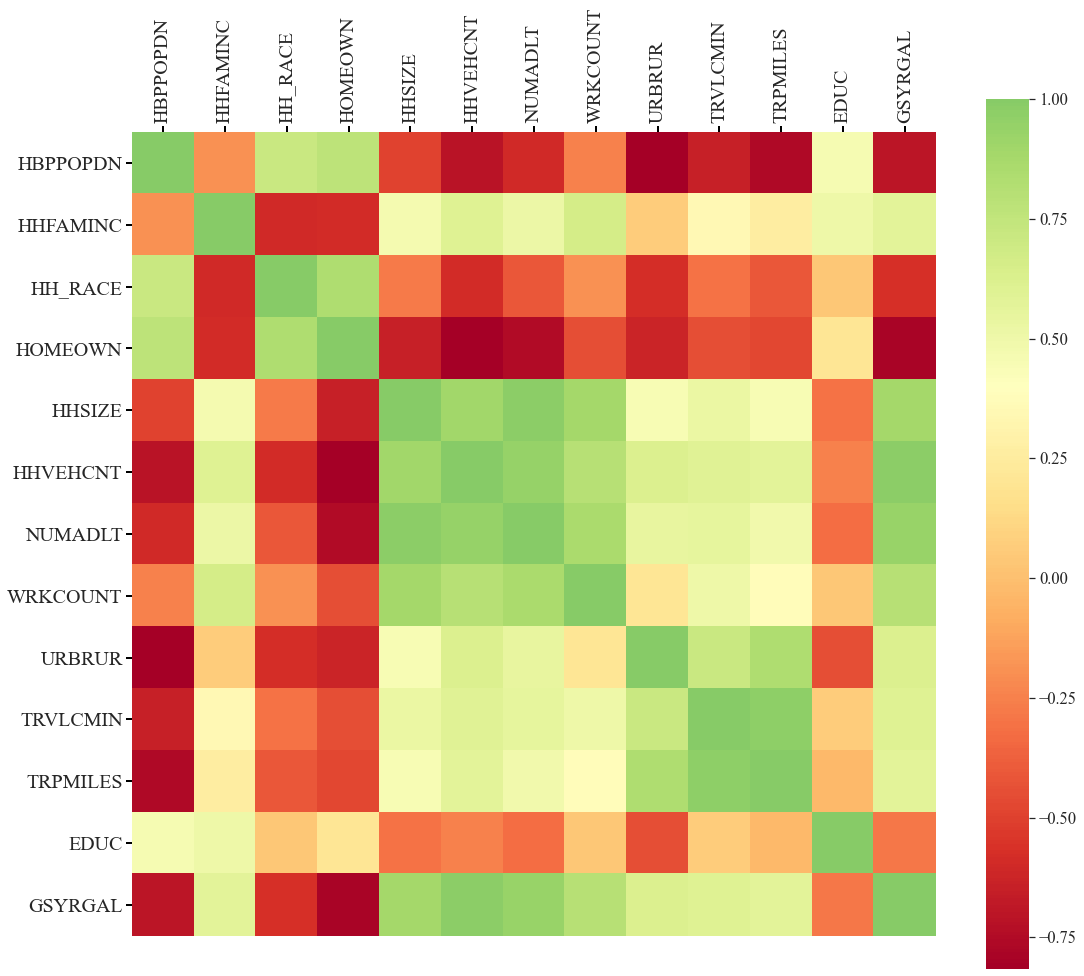

In [21]:
figure, ax = plt.subplots(figsize=(18,16))
# font = {'family': 'serif',
#         'serif': 'Times New Roman',
#         'weight': 'normal',
#         'size': 12}
# plt.rc('font', **font)
sns.set(style="ticks", font='Times New Roman', font_scale=1.5)
ax.axis('on')
ax.tick_params(axis='y',labelsize=20,width=2,color="black")
ax.tick_params(axis='x',labelsize=20,width=2,color="black")
ax.xaxis.tick_top()
sns.heatmap(re_spearman.corr(method='spearman').round(2), cbar=True, square=True, annot=False, ax=ax,cmap='RdYlGn',robust=True,center=0.4)
plt.savefig('re_spearman.png', facecolor='w',dpi=500)

In [22]:
### Drop the variables that are not related to GSYRAL and have strong correlations.
data_final = data.drop(columns=['HOUSEID','NUMADLT','WRKCOUNT','HHSIZE','TRPMILES',\
                                'GSTOTCST'])
data_final.head()
#data_final.to_csv("data_final_0301.csv")

,HBPPOPDN,HHFAMINC,HH_RACE,HOMEOWN,HHVEHCNT,URBRUR,TRVLCMIN,EDUC,GSCOST,GSYRGAL
0,750,7,2,1,5,1,55.833333,3.0,2.312750,2111.159992
1,300,8,1,1,4,2,12.500000,5.0,2.266500,1765.941334
2,17000,10,1,1,2,1,30.555556,5.0,2.465333,470.012633
3,750,3,1,1,2,1,15.000000,2.0,2.440167,947.229455
4,1500,5,1,1,2,1,15.700000,2.0,2.266500,566.408185


In [23]:
data_final.describe()

,HBPPOPDN,HHFAMINC,HH_RACE,HOMEOWN,HHVEHCNT,URBRUR,TRVLCMIN,EDUC,GSCOST,GSYRGAL
count,107441.000000,107441.000000,107441.000000,107441.000000,107441.000000,107441.000000,107441.000000,107441.000000,107441.000000,107441.000000
mean,3854.901760,6.258765,2.743413,1.209669,2.109967,1.225659,24.381493,3.442317,2.416149,1090.678649
std,5163.641096,2.507256,11.674805,0.407074,1.121723,0.418017,31.986537,1.053373,0.275725,1047.281142
min,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.126167,0.027692
25%,300.000000,5.000000,1.000000,1.000000,1.000000,1.000000,12.000000,3.000000,2.266500,452.452103
50%,1500.000000,6.000000,1.000000,1.000000,2.000000,1.000000,17.500000,3.000000,2.312750,850.782324
75%,7000.000000,8.000000,1.000000,1.000000,3.000000,1.000000,26.666667,4.000000,2.465333,1427.638387
max,30000.000000,11.000000,97.000000,2.000000,12.000000,2.000000,1200.000000,5.000000,7.434861,35303.206152


<AxesSubplot:>

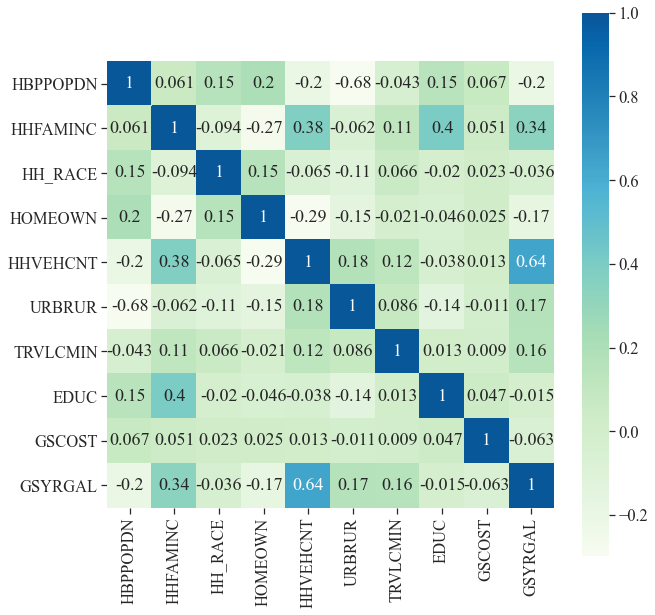

In [24]:
figure, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_final.corr(method='spearman').round(3), square=True, annot=True, ax=ax,cmap='GnBu',robust=True,center=0.4)

In [25]:
### Saperate the data to be train dataset and prediction dataset.
X = data_final[['HBPPOPDN','HH_RACE','HOMEOWN','HHFAMINC','HHVEHCNT','TRVLCMIN','EDUC','URBRUR']].values
Y = data_final.GSYRGAL.values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.80, random_state=0)

In [26]:
data_final[['HBPPOPDN','HH_RACE','HOMEOWN','HHFAMINC','HHVEHCNT','TRVLCMIN','EDUC','URBRUR']].columns

Index(['HBPPOPDN', 'HH_RACE', 'HOMEOWN', 'HHFAMINC', 'HHVEHCNT', 'TRVLCMIN',
       'EDUC', 'URBRUR'],
      dtype='object')

# Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
### Test the parameters.
estimators = [50, 100, 200, 500]
aplhas = [0.0001, 0.001, 0.01, 0.1, 0.9, 0.99]
seeds = [20, 50, 100, 200, 500, 1000, 2000]
for estimator in estimators:
    for alpha in aplhas:
        for num_seed in seeds:
        # gb_model = GradientBoostingRegressor(n_estimators=estimator, alpha=alpha, random_state=0)
        
            gb_model = GradientBoostingRegressor(n_estimators=estimator,alpha=alpha, max_features='sqrt', 
                                             min_samples_leaf=200, min_samples_split=10, loss='ls', random_state =num_seed)
            gb_model.fit(X_train, Y_train)
            score = gb_model.score(X_test, Y_test)
            print('estimator={}, alpha={}, seed={}, accuracy={:.3f}'.format(estimator, alpha,num_seed, score))

estimator=50, alpha=0.0001, seed=20, accuracy=0.287
estimator=50, alpha=0.0001, seed=50, accuracy=0.287
estimator=50, alpha=0.0001, seed=100, accuracy=0.288
estimator=50, alpha=0.0001, seed=200, accuracy=0.286
estimator=50, alpha=0.0001, seed=500, accuracy=0.287
estimator=50, alpha=0.0001, seed=1000, accuracy=0.283
estimator=50, alpha=0.0001, seed=2000, accuracy=0.284
estimator=50, alpha=0.001, seed=20, accuracy=0.287
estimator=50, alpha=0.001, seed=50, accuracy=0.287
estimator=50, alpha=0.001, seed=100, accuracy=0.288
estimator=50, alpha=0.001, seed=200, accuracy=0.286
estimator=50, alpha=0.001, seed=500, accuracy=0.287
estimator=50, alpha=0.001, seed=1000, accuracy=0.283
estimator=50, alpha=0.001, seed=2000, accuracy=0.284
estimator=50, alpha=0.01, seed=20, accuracy=0.287
estimator=50, alpha=0.01, seed=50, accuracy=0.287
estimator=50, alpha=0.01, seed=100, accuracy=0.288
estimator=50, alpha=0.01, seed=200, accuracy=0.286
estimator=50, alpha=0.01, seed=500, accuracy=0.287
estimator=50

In [28]:
gb_model = GradientBoostingRegressor(n_estimators=100,alpha=0.9, max_features='sqrt',
                                     min_samples_leaf=200,loss='ls', random_state = 500)
gb_model.fit(X_train, Y_train)
score = gb_model.score(X_test, Y_test)
print("GB train accuracy: %0.3f" % gb_model.score(X_train, Y_train))
print("GB test accuracy: %0.3f" % gb_model.score(X_test, Y_test))

GB train accuracy: 0.280
GB test accuracy: 0.291


In [29]:
Y_pred = gb_model.predict(X_test)
from sklearn import metrics
MAE = metrics.mean_absolute_error(Y_test, Y_pred).round(3)
MSE = metrics.mean_squared_error(Y_test, Y_pred).round(3)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)).round(3)
R2 = metrics.r2_score(Y_test, Y_pred).round(3)
print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('R2:', R2)

Mean Absolute Error: 502.064
Mean Squared Error: 735457.929
Root Mean Squared Error: 857.588
R2: 0.291


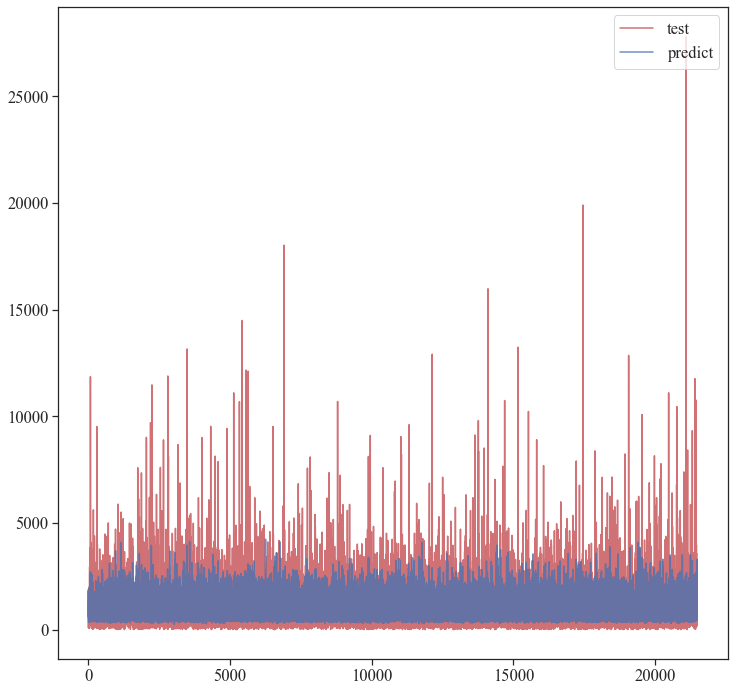

In [30]:
plt.figure(figsize=(12, 12))
plt.plot(range(len(Y_pred)),Y_test,'r',label="test",alpha=0.8)
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict",alpha=0.8)
plt.legend(loc="upper right") 
plt.show()
# plt.savefig('Random Forrest.png', facecolor='w',dpi=500)

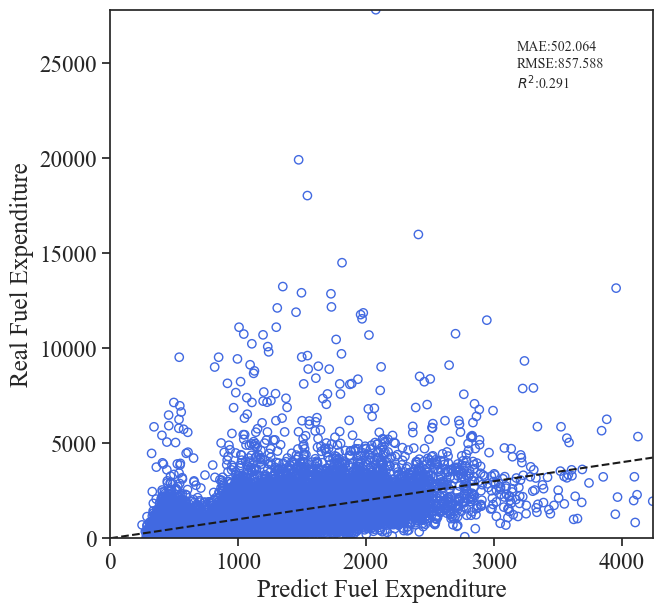

In [31]:
fig, ax = plt.subplots(1, 1,figsize=(7,7),dpi=100)
plt.xlabel("Predict Fuel Expenditure")
plt.ylabel("Real Fuel Expenditure")
bbox = dict(boxstyle="round", fc='1',alpha=0.5)

plt.scatter(Y_pred,Y_test,marker='o',c='none',edgecolors='royalblue')
t = "MAE:"+ str(MAE) + "\nRMSE:" + str(RMSE) + "\n$R^2$:"+ str(R2) 
plt.text(0.75, 0.85, t,
         transform=ax.transAxes, size=10, bbox=bbox)

x=np.arange(max(Y_pred))
ax.plot(x,x,ls='--',c='k')
ax.set(xlim=(0,max(Y_pred)),ylim=(0,max(Y_test)))
plt.show()

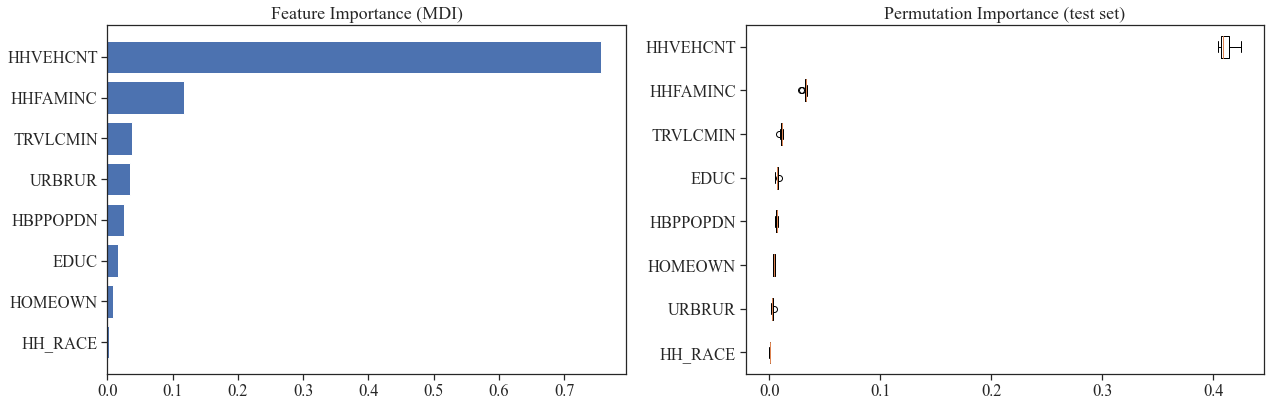

In [32]:
### Check the feature importances.

feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_final[['HBPPOPDN','HH_RACE','HOMEOWN','HHFAMINC','HHVEHCNT','TRVLCMIN','EDUC','URBRUR']].columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
# print(np.array(data_final[['HBPPOPDN','HH_RACE','HOMEOWN','HHFAMINC','HHVEHCNT','TRVLCMIN','EDUC','URBRUR']].columns)[sorted_idx],feature_importance[sorted_idx])


from sklearn.inspection import permutation_importance
result = permutation_importance(gb_model, X_test, Y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(data_final[['HBPPOPDN','HH_RACE','HOMEOWN','HHFAMINC','HHVEHCNT','TRVLCMIN','EDUC','URBRUR']].columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
# print(np.array(data_final[['HBPPOPDN','HH_RACE','HOMEOWN','HHFAMINC','HHVEHCNT','TRVLCMIN','EDUC','URBRUR']].columns)[sorted_idx],result.importances[sorted_idx])
fig.tight_layout()
plt.show()

## Using the predition model and ACS data to predict the average fuel consumption per household in census tracts. 

In [33]:
Pre_data = pd.read_excel('Predict_census tract.xlsx',dtype={"GEOID":str})
#'HBPPOPDN','HH_RACE','HOMEOWN','HHFAMINC','HHVEHCNT','TRVLCMIN','EDUC','URBRUR'
Pre_data.head()

,Unnamed: 0,AFFGEOID,GEOID,geometry,popden,Race,House tenure,Vehicles,travel time,education,GSCOST,urban/rural
0,0,1400000US01117030317,01117030317,"POLYGON ((-86.852665 33.281478, -86.8491899999...",2820.152853,2.074399,1.096,1.833,31.526847,2.943818,2.146052,1.2158
1,1,1400000US01119011500,01119011500,"POLYGON ((-88.40378899999999 32.44977, -88.403...",16.609164,1.884195,1.330,1.529,27.380769,2.386957,2.146052,2.0000
2,2,1400000US01121010900,01121010900,"POLYGON ((-86.118971 33.42176, -86.11435299999...",1058.486943,1.616550,1.219,1.544,22.077963,2.685673,2.146052,1.1757
3,3,1400000US01125010102,01125010102,"POLYGON ((-87.60330399999999 33.359237, -87.60...",12.465127,1.072123,1.036,2.172,31.481144,2.775216,2.146052,1.2249
4,4,1400000US01089000701,01089000701,"POLYGON ((-86.61668899999999 34.771281, -86.60...",2424.142524,9.045601,1.550,1.471,20.245846,2.551775,2.146052,1.1548


In [34]:
income = pd.read_csv('income.csv')
income.head()

,GEO_ID,NAME,income
0,1400000US01001020100,"Census Tract 201, Autauga County, Alabama",60208
1,1400000US01001020200,"Census Tract 202, Autauga County, Alabama",43958
2,1400000US01001020300,"Census Tract 203, Autauga County, Alabama",55345
3,1400000US01001020400,"Census Tract 204, Autauga County, Alabama",59663
4,1400000US01001020500,"Census Tract 205, Autauga County, Alabama",66108


In [35]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GEO_ID  74001 non-null  object
 1   NAME    74001 non-null  object
 2   income  74001 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [36]:
Pre_data = pd.merge(Pre_data,income,left_on='AFFGEOID',right_on='GEO_ID')

In [37]:
#'HBPPOPDN','HH_RACE','HOMEOWN','HHFAMINC','HHVEHCNT','TRVLCMIN','EDUC','URBRUR'
X = Pre_data[['popden','Race','House tenure','Vehicles','travel time','education','urban/rural','income']]

In [38]:
Y = gb_model.predict(X)

In [39]:
fuel = pd.DataFrame(Y)
fuel.head()

,0
0,2636.735064
1,2953.052851
2,2715.082580
3,2898.507068
4,2530.279069


In [40]:
fuel[0].mean()

2659.353233976435

In [41]:
Pre_data['fuel']=fuel[0]
Pre_data.head()

,Unnamed: 0,AFFGEOID,GEOID,geometry,popden,Race,House tenure,Vehicles,travel time,education,GSCOST,urban/rural,GEO_ID,NAME,income,fuel
0,0,1400000US01117030317,01117030317,"POLYGON ((-86.852665 33.281478, -86.8491899999...",2820.152853,2.074399,1.096,1.833,31.526847,2.943818,2.146052,1.2158,1400000US01117030317,"Census Tract 303.17, Shelby County, Alabama",72527,2636.735064
1,1,1400000US01119011500,01119011500,"POLYGON ((-88.40378899999999 32.44977, -88.403...",16.609164,1.884195,1.330,1.529,27.380769,2.386957,2.146052,2.0000,1400000US01119011500,"Census Tract 115, Sumter County, Alabama",26838,2953.052851
2,2,1400000US01121010900,01121010900,"POLYGON ((-86.118971 33.42176, -86.11435299999...",1058.486943,1.616550,1.219,1.544,22.077963,2.685673,2.146052,1.1757,1400000US01121010900,"Census Tract 109, Talladega County, Alabama",41047,2715.082580
3,3,1400000US01125010102,01125010102,"POLYGON ((-87.60330399999999 33.359237, -87.60...",12.465127,1.072123,1.036,2.172,31.481144,2.775216,2.146052,1.2249,1400000US01125010102,"Census Tract 101.02, Tuscaloosa County, Alabama",78457,2898.507068
4,4,1400000US01089000701,01089000701,"POLYGON ((-86.61668899999999 34.771281, -86.60...",2424.142524,9.045601,1.550,1.471,20.245846,2.551775,2.146052,1.1548,1400000US01089000701,"Census Tract 7.01, Madison County, Alabama",29481,2530.279069


In [ ]:
### save the results
Pre_data.to_excel('Pre_result.xlsx')

The Following are some ML models droped.

In [ ]:
## Linear Regression Model

LR = LinearRegression(fit_intercept = True)
 
LR.fit(X_train,Y_train)

a  = LR.intercept_
 
b = LR.coef_
 
print("Intercept",a,",Regression coefficients：",b)

score = LR.score(X_test,Y_test)
print(score)
Y_pred = LR.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2:',metrics.r2_score(Y_test, Y_pred))

In [ ]:
## Random Forrest

from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
estimators = [20,80,100,200]
leaf_options = [20,80,100,200,400,600]
for estimator in estimators:
    for leaf_size in leaf_options:
        RF = RandomForestRegressor(n_estimators=estimator,random_state=50, min_samples_leaf = leaf_size)
        RF.fit(X_train, Y_train)
        score = RF.score(X_test,Y_test)
        print("estimator={}, leaf_size={},score:{:.3f}".format(estimator,leaf_size, score))
        
RF = RandomForestRegressor(n_estimators=20,min_samples_leaf = 200, random_state=50)
RF.fit(X_train, Y_train)
score = RF.score(X_test,Y_test)
Y_pred = RF.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2:',metrics.r2_score(Y_test, Y_pred))

In [ ]:
## Decesion Tree

from sklearn import tree
leaf_options = [20,80,100,200,400,600]
split_options = [5, 10, 20, 80, 100, 200, 400, 600]
for split in split_options:
    for leaf_size in leaf_options:
        clf = tree.DecisionTreeRegressor(min_samples_leaf=leaf_size,min_samples_split = split)
        clf.fit(X_train, Y_train)
        score = clf.score(X_test, Y_test)
        print(split, leaf_size, score)
        
clf = tree.DecisionTreeRegressor(min_samples_leaf=400,min_samples_split = 5)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2:',metrics.r2_score(Y_test, Y_pred))

In [ ]:
## ElasticNet

from sklearn import linear_model
ENR=linear_model.ElasticNet()
ENR.fit(X_train,Y_train)
Y_pred = ENR.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2:',metrics.r2_score(Y_test, Y_pred))

In [ ]:
## ANN Model

from sklearn.neural_network import MLPRegressor
units = [20, 50, 100, 200,300, 400]
aplhas = [0.00001, 0.001, 0.01, 0.1, 1.0]
for unit in units:
    for alpha in aplhas:
        ann_model = MLPRegressor(hidden_layer_sizes=unit, activation='logistic', solver='adam', alpha=alpha, max_iter=500, random_state=50)
        ann_model.fit(X_train, Y_train)
        score = ann_model.score(X_test, Y_test)
        print('unit={},alpha={},accuracy{:.3f}'.format(unit, alpha, score))
        
ann_model = MLPRegressor(hidden_layer_sizes=50, activation='logistic', solver='adam', alpha=0.001, max_iter=1000000, random_state=0)
ann_model.fit(X_train, Y_train)
print(ann_model.score(X_test, Y_test))

Y_pred = ann_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2:',metrics.r2_score(Y_test, Y_pred))